In [3]:
import torch
from torch.utils.data import Dataset, DataLoader
import os, os.path 
import numpy as np
import pickle
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os 
os.chdir('/content/drive/MyDrive/CSE_251B')
#os.chdir('/content/drive/MyDrive/CSE-251B-Project/data/')
#os.listdir()

In [ ]:
!ls

In [4]:
train_path = "./train/train/"

#train_path = "./val_in/val_in"
training_samples = []
# The glob module finds all the pathnames matching a specified pattern
train_pkl_lst = glob(os.path.join(train_path, '*'))
print(len(train_pkl_lst))

205942


# Load training data

In [5]:
training_samples = []
fnames = []
for i in range(np.array(train_pkl_lst).shape[0]):
    fnames.append(train_pkl_lst[i])
    with open(train_pkl_lst[i], 'rb') as f:
        training_samples.append(pickle.load(f))
    if(i % 50000 == 0):
        print(i)

0
50000
100000
150000
200000


In [6]:
training_samples = np.array(training_samples)
print(training_samples.shape)

(205942,)


In [ ]:
print(training_samples[0].keys())

In [15]:
print(training_samples[1]['city'])

PIT


In [ ]:
print(training_samples[0]['p_in'][:,:,0][0])
print(training_samples[0]['p_in'][:,:,0][1])
print(training_samples[0]['p_in'][:,:,0][2])
print(len(training_samples[0]['p_in'][:,:,0]))

In [16]:
input_pos = []
output_pos = []

for i in range(len(training_samples)):
    #if training_samples[i]['city'] == 'MIA':
     if training_samples[i]['city'] == 'PIT':
        input_pos.append(training_samples[i]['p_in'])
        output_pos.append(training_samples[i]['p_out'])

        

random_idx = np.random.choice(np.arange(len(input_pos)),25000)
input_pos = np.array(input_pos)
input_pos = input_pos[random_idx]
print(input_pos.shape)
output_pos = np.array(output_pos)
output_pos = output_pos[random_idx]
print(output_pos.shape)

(25000, 60, 19, 2)
(25000, 60, 30, 2)


In [17]:
x_pos_in = torch.Tensor(input_pos[:,:,:,0])
x_pos_in = torch.flatten(x_pos_in)
y_pos_in = torch.Tensor(input_pos[:,:,:,1])
y_pos_in = torch.flatten(y_pos_in)
xpos_in_list = x_pos_in.tolist()
ypos_in_list = y_pos_in.tolist()

In [18]:
x_pos_out = torch.Tensor(output_pos[:,:,:,0])
x_pos_out = torch.flatten(x_pos_out)
y_pos_out = torch.Tensor(output_pos[:,:,:,1])
y_pos_out = torch.flatten(y_pos_out)
xpos_out_list = x_pos_out.tolist()
ypos_out_list = y_pos_out.tolist()

min x_pos: 0.0, max x_pos: 4738.98486328125
min y_pos: 0.0, max y_pos: 2638.939697265625
min x_pos: 0.0, max x_pos: 4744.28076171875
min y_pos: 0.0, max y_pos: 2646.548095703125


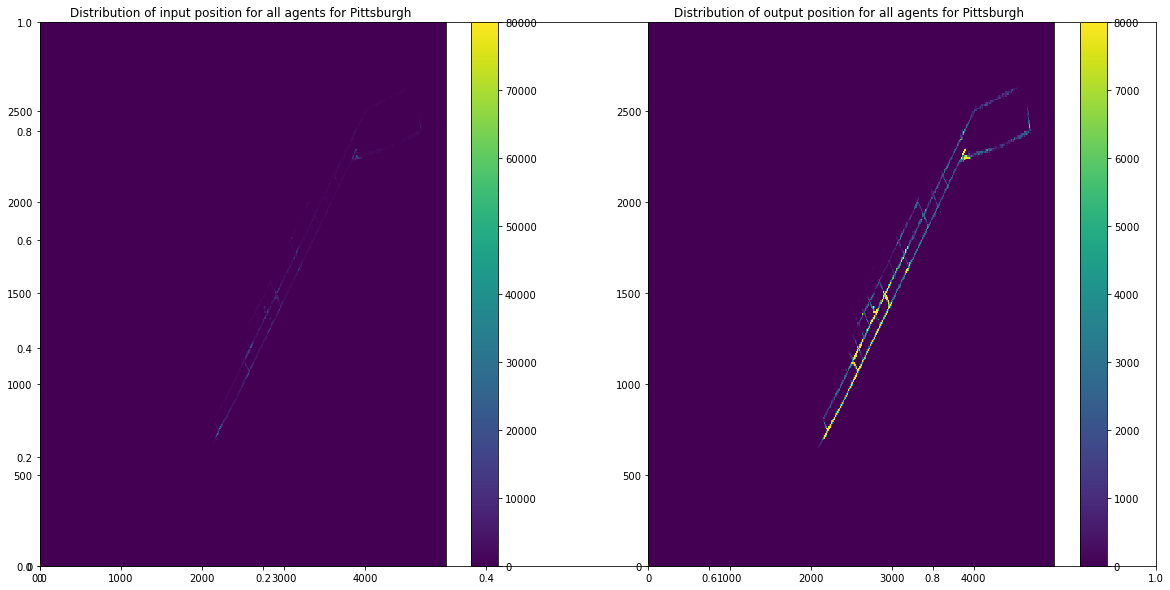

In [20]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot()
print(f'min x_pos: {min(xpos_in_list)}, max x_pos: {max(xpos_in_list)}')
print(f'min y_pos: {min(ypos_in_list)}, max y_pos: {max(ypos_in_list)}')
ax1 = fig.add_subplot(121)
_,_,_,im = ax1.hist2d(xpos_in_list, ypos_in_list,bins=[np.arange(0,5000,10),np.arange(0,3000,10)], vmin=0, vmax=80000)

ax1.set_title("Distribution of input position for all agents for Pittsburgh ")
fig.colorbar(im, ax=ax1)



ax2 = fig.add_subplot(122)
print(f'min x_pos: {min(xpos_out_list)}, max x_pos: {max(xpos_out_list)}')
print(f'min y_pos: {min(ypos_out_list)}, max y_pos: {max(ypos_out_list)}')
_,_,_,im = ax2.hist2d(xpos_out_list, ypos_out_list,bins=[np.arange(0,5000,10),np.arange(0,3000,10)], vmin=0, vmax=8000)
           
ax2.set_title("Distribution of output position for all agents for Pittsburgh ")
fig.colorbar(im, ax=ax2)



In [ ]:
#x_pos = torch.Tensor(training_samples[0]['p_in'][:,:,0])
x_pos = torch.Tensor(output_pos[:,:,:,0])
x_pos = torch.flatten(x_pos)

#y_pos = torch.Tensor(training_samples[0]['p_in'][:,:,1])
y_pos = torch.Tensor(output_pos[:,:,:,1])

y_pos = torch.flatten(y_pos)

xpos_list = x_pos.tolist()
ypos_list = y_pos.tolist()


# for i in range(len(training_samples)):
#     t_x = training_samples[i]['p_in'][:,:,0]
#     t_y = training_samples[i]['p_in'][:,:,0]
#     for j in range(len(t_x)):
#         for k in range(len(t_x[0])):
#             x_pos.append(training_samples[i]['p_in'][:,:,0][j][k])
#             y_pos.append(training_samples[i]['p_in'][:,:,1][j][k])


In [ ]:

fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot()
print(f'min x_pos: {min(xpos_list)}, max x_pos: {max(xpos_list)}')
print(f'min y_pos: {min(ypos_list)}, max y_pos: {max(ypos_list)}')
#ax1 = sns.heatmap(x_pos, linewidth=0.5)
_,_,_,im = ax1.hist2d(xpos_list, ypos_list,bins=[np.arange(-7,4800,50),np.arange(0,4094,50)], vmin=0, vmax=10000)
           
ax1.set_title("Distribution of input position for all agents")
fig.colorbar(im, ax=ax1)
